In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from theano import tensor as T
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

# Chapter 6 - Latent-mixture models
## 6.1 Exam scores


Exam result consistent of 2 group of students - one group is purely guess and the other with a >.5 accuracy rate

$$ z_{i} \sim \text{Bernoulli}(0.5)  $$
$$ \phi \sim \text{Uniform}(0.5, 1) $$
$$ \psi = 0.5 $$  
$$   \theta_{i} \sim
\begin{cases}
\phi  & \text{if $z_{i} = 1$} \\
\psi  & \text{if $z_{i} = 0$}
\end{cases}  $$
$$ k_{i} \sim \text{Binomial}(\theta_{i}, n) $$

(It is also possible to estimate this model using a EM algorthim.)

Optimization terminated successfully.
         Current function value: 91.350405
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5


Assigned BinaryGibbsMetropolis to zi
100%|██████████| 30000/30000.0 [00:34<00:00, 878.08it/s]


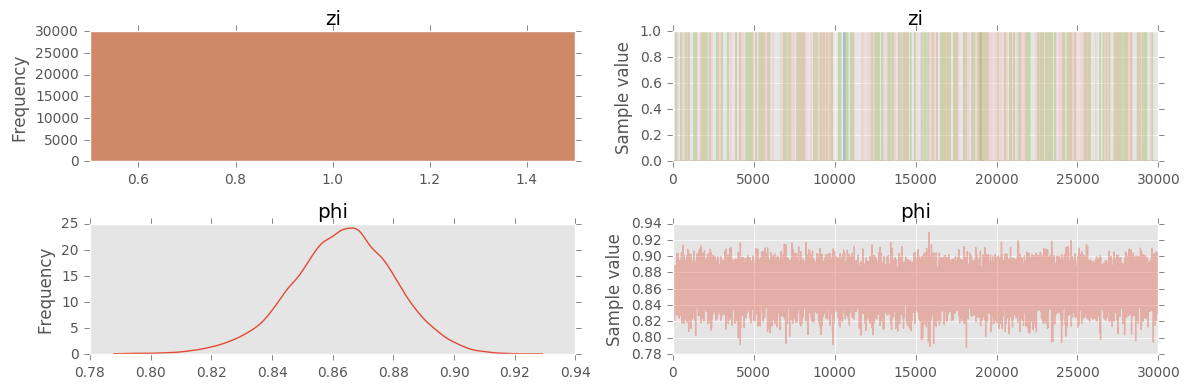

Grouping [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [2]:
# pymc3
k = np.array([21,17,21,18,22,31,31,34,34,35,35,36,39,36,35])
p = len(k) #number of people
n = 40 # number of questions

with pm.Model() as model1:
    # group prior
    zi = pm.Bernoulli("zi",p = .5, shape = p)
    # accuracy prior
    phi = pm.Uniform("phi",upper=1,lower=.5)
    psi = .5
    theta = pm.Deterministic("theta",phi*T.eq(zi,1)+psi*T.eq(zi,0))
    
    # observed
    ki = pm.Binomial("ki",p = theta, n = n, observed = k)
    
    # step=pm.NUTS()
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    
    trace1=pm.sample(3e4, step, model=model1)

pm.traceplot(trace1[50:],['zi','phi']);
plt.show()
ztrace = trace1['zi'][50:]
print('Grouping',ztrace[-1,:])

## 6.2 Exam scores with individual differences


$$ z_{i} \sim \text{Bernoulli}(0.5)  $$
$$ \mu \sim \text{Uniform}(0.5, 1) $$
$$ \lambda \sim \text{Gamma}(.001, .001)$$  
$$ \phi_{i} \sim \text{Gaussian}(\mu, \lambda)_{\mathcal I(0,1)} $$
$$ \psi = 0.5 $$  
$$   \theta_{i} \sim
\begin{cases}
\phi_{i}  & \text{if $z_{i} = 1$} \\
\psi  & \text{if $z_{i} = 0$}
\end{cases}  $$
$$ k_{i} \sim \text{Binomial}(\theta_{i}, n) $$

         Current function value: 64.417527
         Iterations: 1
         Function evaluations: 21
         Gradient evaluations: 9


Assigned BinaryGibbsMetropolis to zi
100%|██████████| 30000/30000.0 [01:57<00:00, 298.04it/s]


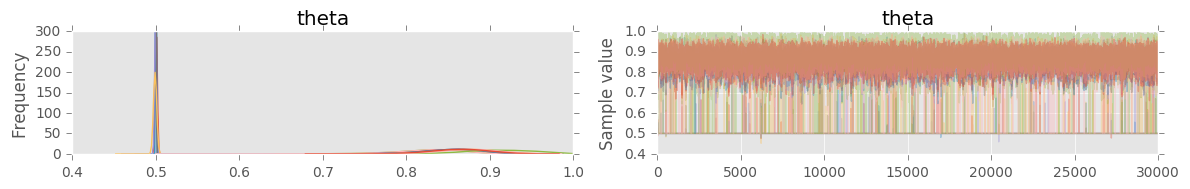

Grouping [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [3]:
# pymc3 - need some tuning to get the same result as in JAGS
k = np.array([21,17,21,18,22,31,31,34,34,35,35,36,39,36,35])
p = len(k) #number of people
n = 40 # number of questions

with pm.Model() as model2:
    # group prior
    zi = pm.Bernoulli("zi",p = .5, shape = p)
    # accuracy prior
    psi = .5
    mu = pm.Uniform("mu",upper=1,lower=.5)
    lambda_ = pm.Gamma("lambda_",alpha=.001,beta=.001)
    phi = pm.Normal("phi",mu = mu, tau = lambda_, shape = p)
    
    theta = pm.Deterministic("theta",phi*T.eq(zi,1)+psi*T.eq(zi,0))
    
    # observed
    ki = pm.Binomial("ki",p = theta, n = n, observed = k)
    
    # step=pm.NUTS()
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    
    trace2=pm.sample(3e4, step, model=model2)

pm.traceplot(trace2[:],['theta']);
plt.show()
ztrace = trace2['zi'][:]
print('Grouping',ztrace[-1,:])

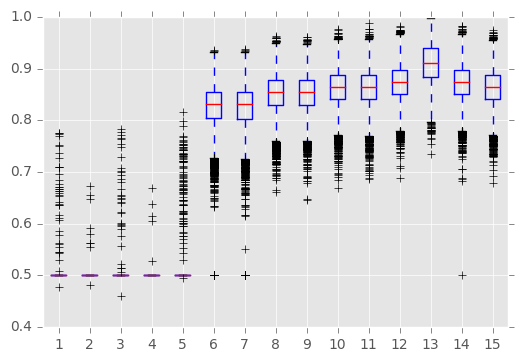

In [4]:
plt.figure()
thetapost = trace2['theta'][15000:]
plt.boxplot(thetapost)
plt.show()

## 6.3 Twenty questions


Suppose a group of 10 people attend a lecture, and are asked a set of 20 questions afterwards, with every answer being either correct or incorrect.  
$$ p_{i},q_{j} \sim \text{Beta}(1,1)$$
$$ \theta_{ij} = p_{i}q_{j} $$
$$ k_{ij} \sim \text{Bernoulli}(\theta_{ij}) $$ 

Optimization terminated successfully.
         Current function value: 120.839236
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 15


Assigned BinaryGibbsMetropolis to kij_missing
100%|██████████| 30000/30000.0 [00:54<00:00, 550.22it/s]


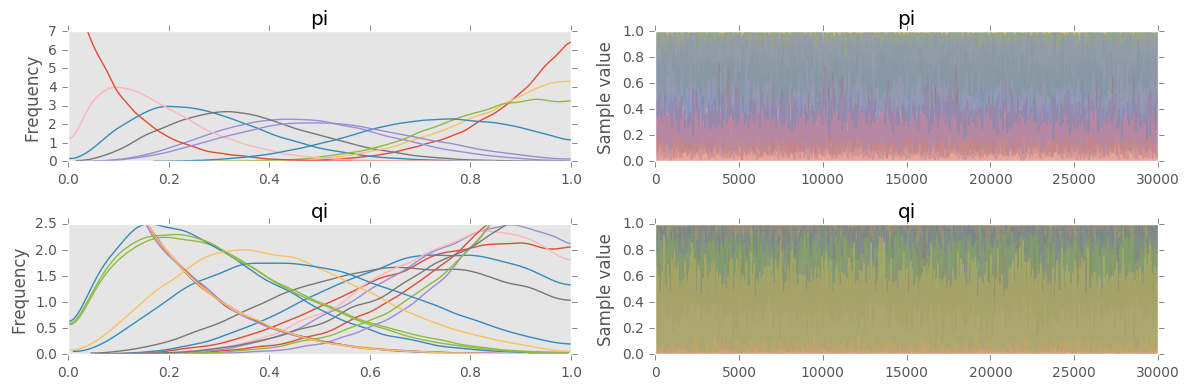

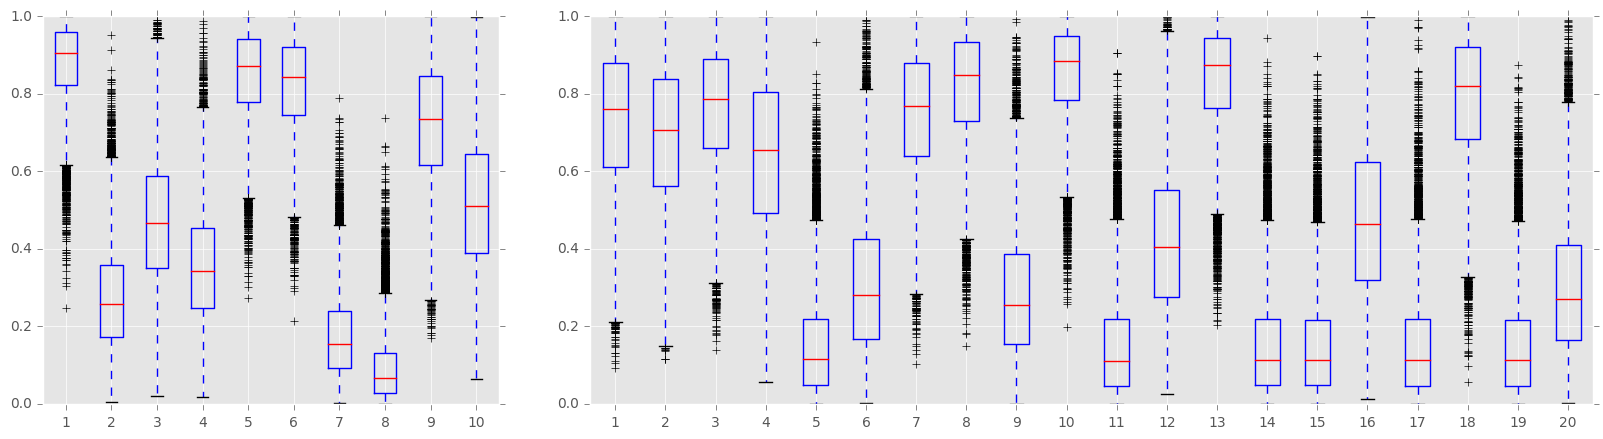

In [5]:
dset = 2
if dset==1:
    k = np.array([1,1,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,
        0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
        0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,
        0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,
        1,0,1,1,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,
        1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,
        0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
        0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,
        1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0]).reshape(10,-1)
elif dset==2:
    k = np.ma.masked_values([1,1,1,1,0,0,1,1,0,1,0,0,-999,0,0,1,0,1,0,0,
        0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
        0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,
        0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,
        1,0,1,1,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,
        1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,
        0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,
        0,0,0,0,-999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
        0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,
        1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,-999,0,0], value=-999).reshape(10,-1)
# print(k)
Np,Nq = k.shape

with pm.Model() as model3:
    # prior
    pi = pm.Beta("pi",alpha=1,beta=1,shape=Np)
    qi = pm.Beta("qi",alpha=1,beta=1,shape=Nq)
    # accuracy prior
    theta = pm.Deterministic("theta",T.outer(pi,qi))
    # observed
    kij = pm.Bernoulli("kij",p=theta, observed = k)
    
    # step=pm.NUTS()
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    
    trace3=pm.sample(3e4, step, model=model3)

pm.traceplot(trace3[:],['pi','qi']);
plt.show()

fig = plt.figure(figsize=(20, 5)) 
gs = gridspec.GridSpec(1,3) 
ax0 = plt.subplot(gs[0])
pipost = trace3['pi'][15000:]
ax0.boxplot(pipost)

ax1 = plt.subplot(gs[1:])
qipost = trace3['qi'][15000:]
ax1.boxplot(qipost)
plt.show()

## 6.4 The two-country quiz


$$ \alpha \sim \text{Uniform}(0,1) $$
$$ \beta \sim \text{Uniform}(0,\alpha) $$
$$ x_{i} \sim \text{Bernoulli}(0.5) $$
$$ z_{j} \sim \text{Bernoulli}(0.5) $$
$$   \theta_{ij} \sim
\begin{cases}
\alpha  & \text{if $x_{i} = z_{j}$} \\
\beta  & \text{if $x_{i} \neq z_{j}$}
\end{cases}  $$
$$ k_{ij} \sim \text{Bernoulli}(\theta_{ij}) $$ 

Assigned NUTS to alpha_interval_
Assigned NUTS to beta_interval_
Assigned BinaryGibbsMetropolis to xi
Assigned BinaryGibbsMetropolis to zj
Assigned BinaryGibbsMetropolis to kij_missing
100%|██████████| 3000/3000.0 [00:24<00:00, 123.86it/s]


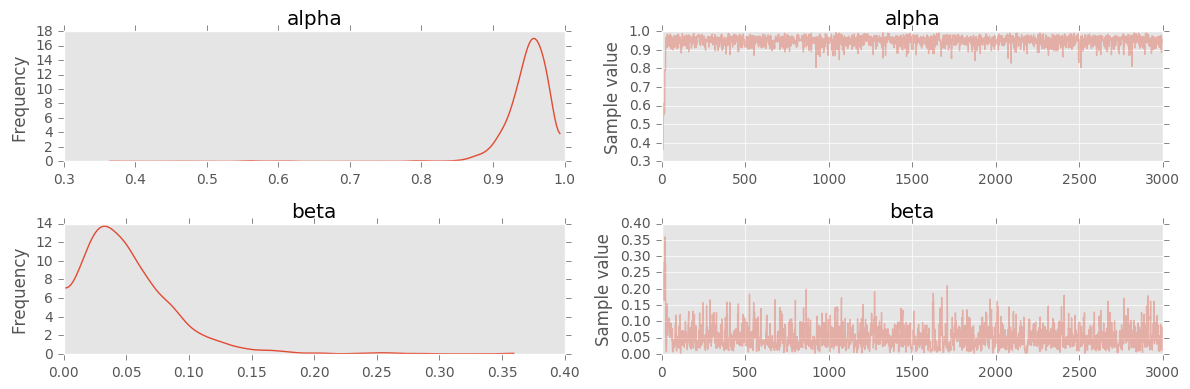

xi [1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0]
zj [1 0 0 1 1 0 0 1]


In [6]:
dset = 3
if dset==1:
    k = np.array([1,0,0,1,1,0,0,1,
      1,0,0,1,1,0,0,1,
      0,1,1,0,0,1,0,0,
      0,1,1,0,0,1,1,0,
      1,0,0,1,1,0,0,1,
      0,0,0,1,1,0,0,1,
      0,1,0,0,0,1,1,0,
      0,1,1,1,0,1,1,0]).reshape(8,-1)
elif dset==2:
    k = np.ma.masked_values([1,0,0,1,1,0,0,1,
      1,0,0,1,1,0,0,1,
      0,1,1,0,0,1,0,0,
      0,1,1,0,0,1,1,0,
      1,0,0,1,1,0,0,1,
      0,0,0,1,1,0,0,1,
      0,1,0,0,0,1,1,0,
      0,1,1,1,0,1,1,0,
      1,0,0,1,-999,-999,-999,-999,
      0,-999,-999,-999,-999,-999,-999,-999,
      -999,-999,-999,-999,-999,-999,-999,-999], value=-999).reshape(11,-1)
elif dset==3:
    k = np.ma.masked_values([1,0,0,1,1,0,0,1,
      1,0,0,1,1,0,0,1,
      1,0,0,1,1,0,0,1,
      1,0,0,1,1,0,0,1,
      1,0,0,1,1,0,0,1,
      1,0,0,1,1,0,0,1,
      1,0,0,1,1,0,0,1,
      1,0,0,1,1,0,0,1,
      1,0,0,1,1,0,0,1,
      1,0,0,1,1,0,0,1,
      1,0,0,1,1,0,0,1,
      1,0,0,1,1,0,0,1,
      0,1,1,0,0,1,0,0,
      0,1,1,0,0,1,1,0,
      1,0,0,1,1,0,0,1,
      0,0,0,1,1,0,0,1,
      0,1,0,0,0,1,1,0,
      0,1,1,1,0,1,1,0,
      1,0,0,1,-999,-999,-999,-999,
      0,-999,-999,-999,-999,-999,-999,-999,
      -999,-999,-999,-999,-999,-999,-999,-999], value=-999).reshape(21,-1)

Nx,Nz = k.shape

with pm.Model() as model4:
    # prior
    alpha = pm.Uniform("alpha",lower=0,upper=1)
    beta = pm.Uniform("beta",lower=0,upper=alpha)
    
    xi = pm.Bernoulli("xi",p=.5,shape=Nx)
    zj = pm.Bernoulli("zj",p=.5,shape=Nz)
    
    # accuracy prior
    theta = pm.Deterministic("theta",
                             alpha*(T.outer(T.eq(xi,0),T.eq(zj,0))+T.outer(T.eq(xi,1),T.eq(zj,1)))+
                             beta*(T.outer(T.eq(xi,0),T.eq(zj,1))+T.outer(T.eq(xi,0),T.eq(zj,1))))
    
    
    # observed
    kij = pm.Bernoulli("kij",p=theta, observed = k)
    
    # step=pm.Metropolis()
    # start = pm.find_MAP()
    # step = pm.NUTS(scaling=start)
    
    trace4=pm.sample(3e3, model=model4)

pm.traceplot(trace4[:],['alpha','beta']);
plt.show()

xtrace = trace4['xi'][:]
print('xi',xtrace[-1,:])
ztrace = trace4['zj'][:]
print('zj',ztrace[-1,:])

## 6.5 Assessment of malingering


$$ \psi^b \sim \text{Uniform}(0.5,1) $$
$$ \psi^m \sim \text{Uniform}(0,\psi^b) $$
$$ z_{i} \sim \text{Bernoulli}(0.5) $$
$$   \theta_{ij} \sim
\begin{cases}
\psi^b  & \text{if $z_{i} = 0$} \\
\psi^m  & \text{if $z_{i} = 1$}
\end{cases}  $$
$$ k_{i} \sim \text{Binomial}(\theta_{i},n) $$ 

Assigned NUTS to psib_interval_
Assigned NUTS to psim_interval_
Assigned BinaryGibbsMetropolis to zi
100%|██████████| 3000/3000.0 [00:07<00:00, 377.08it/s]


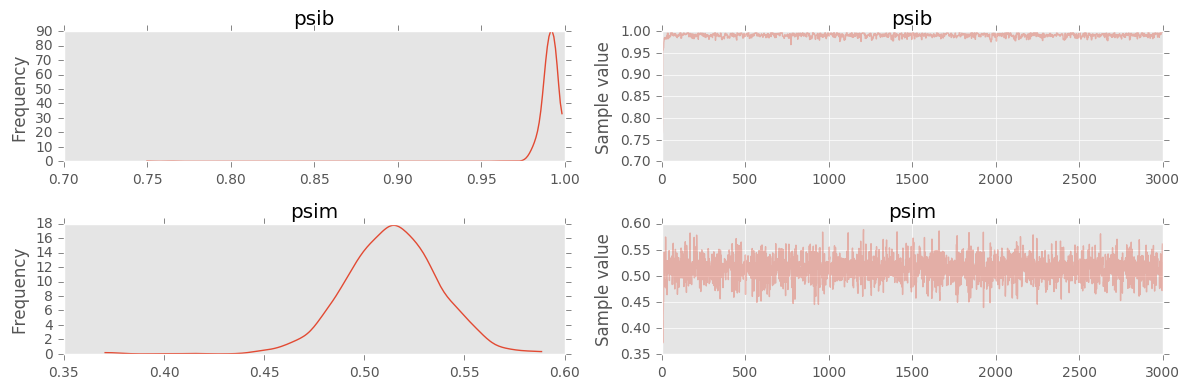

zi-end [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1]
zi-mode ModeResult(mode=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]]), count=array([[3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 2995,
        3000, 3000, 3000, 3000, 2997, 3000, 3000, 3000, 2996, 2990, 2995]]))


In [7]:
k = np.array([45,45,44,45,44,45,45,45,45,45,30,20,6,44,44,27,25,17,14,27,35,30])
p = len(k) # number of people
n = 45        # number of questions

with pm.Model() as model5:
    # prior
    psib = pm.Uniform("psib",lower=0.5,upper=1)
    psim = pm.Uniform("psim",lower=0,upper=psib)
    
    zi = pm.Bernoulli("zi",p=.5,shape=p)
    
    theta = pm.Deterministic("theta",psib*(T.eq(zi,0))+psim*(T.eq(zi,1)))
    
    # observed
    kij = pm.Binomial("kij",p=theta,n=n, observed = k)
    
#     step1=pm.Metropolis(psib)
#     step2=pm.Metropolis(psim)
#     trace5=pm.sample(3e4, step=[step1,step2], model=model5)
    
    # step = pm.NUTS()
    trace5=pm.sample(3e3, model=model5)
    
#     start = pm.find_MAP()
#     step = pm.NUTS(scaling=start)
#     trace5=pm.sample(3e4, step, model=model5)

pm.traceplot(trace5[:],['psib','psim']);
plt.show()

ztrace = trace5['zi'][:]
print('zi-end',ztrace[-1,:])
print('zi-mode',stats.mode(ztrace[:],axis=0))

 [-----------------100%-----------------] 10000 of 10000 complete in 1.1 secPlotting psim
Plotting psib
[[False False False False False False False False False False  True  True
   True False False  True  True  True  True  True  True  True]]


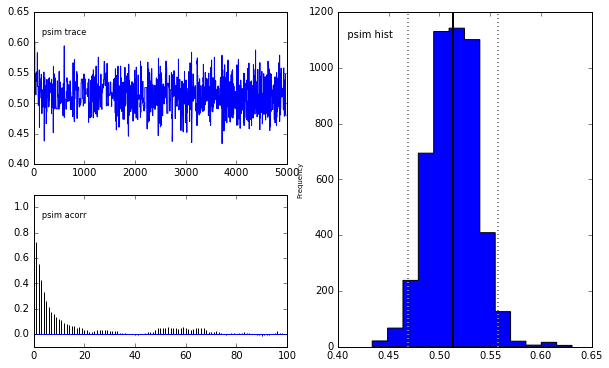

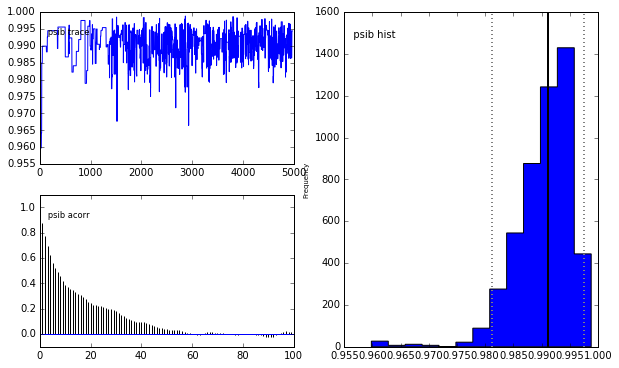

In [15]:
# using pymc2 - the result of grouping is the same with JAGS
import pymc as pymc
psib = pymc.Uniform("psib",lower=0.5,upper=1)
psim = pymc.Uniform("psim",lower=0,upper=psib)
zi = pymc.Bernoulli("zi",p=.5,size=p)

def thetafunc(psib=psib,psim=psim,zi=zi):
    return psib*(zi==0)+psim*(zi==1)
theta = pymc.Deterministic(eval = thetafunc,
                  name = 'theta',
                  parents = {'psib': psib,
                          'psim': psim,
                          'zi': zi},
                  doc = 'Theta',
                  trace = False,
                  verbose = 0,
                  dtype=float,
                  plot=False)

kij = pymc.Binomial("kij",p=theta, n=n, value=k,observed = True)

testmodel = pymc.Model([psib,psim,zi,kij,theta])
mcmc = pymc.MCMC(testmodel)
mcmc.sample(iter = 10000, burn = 50, thin = 2)
pymc.Matplot.plot(mcmc)
zi =  mcmc.trace("zi")[:]
print(zi[-1:])

## 6.6 Individual differences in malingering


$$ \mu_{b} \sim \text{Beta}(1,1) $$
$$ \mu_{d} \sim \text{Gaussian}(0,0.5)_{\mathcal I(0,∞)} $$
$$ \lambda_{b} \sim \text{Uniform}(40,800) $$
$$ \lambda_{m} \sim \text{Uniform}(4,100) $$
$$ z_{i} \sim \text{Bernoulli}(\phi) $$
$$   \theta_{i} \sim
\begin{cases}
\text{Beta}(\mu_{b}\lambda_{b},(1-\mu_{b})\lambda_{b})  & \text{if $z_{i} = 0$} \\
\text{Beta}(\mu_{m}\lambda_{m},(1-\mu_{m})\lambda_{m})  & \text{if $z_{i} = 1$}
\end{cases}  $$
$$ k_{i} \sim \text{Binomial}(\theta_{i},n) $$ 
$$ \text{logit}\mu_{m} = \text{logit}\mu_{b} - \mu_{d} $$
$$ \phi \sim \text{Beta}(5,5)$$

In [8]:
k = np.array([45,45,44,45,44,45,45,45,45,45,30,20,6,44,44,27,25,17,14,27,35,30])
p = len(k) # number of people
n = 45        # number of questions

with pm.Model() as model6:
    # prior
    mub = pm.Beta("mub",alpha=1,beta=1)
    mud = pm.HalfNormal("mud",sd=.5)
    lambdab = pm.Uniform("lambdab",lower=40,upper=800)
    lambdam = pm.Uniform("lambdam",lower=4,upper=100)
    psi = pm.Beta("psi",alpha=5,beta=5)
    
    zi = pm.Bernoulli("zi",p=psi,shape=p)
    
    mum = pm.Deterministic("mum",1/(1+T.exp(T.log(1/mub-1)+mud)))
    theta1 = pm.Beta("theta1",alpha=mub*lambdab,beta=(1-mub)*lambdab)
    theta2 = pm.Beta("theta2",alpha=mum*lambdam,beta=(1-mum)*lambdam)
    
    theta = pm.Deterministic("theta",theta1*(T.eq(zi,0))+theta2*(T.eq(zi,1)))
    
    # observed
    kij = pm.Binomial("kij",p=theta, n=n, observed = k)

Optimization terminated successfully.
         Current function value: 266.016261
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23


Assigned BinaryGibbsMetropolis to zi
100%|██████████| 10000/10000.0 [02:12<00:00, 75.37it/s]


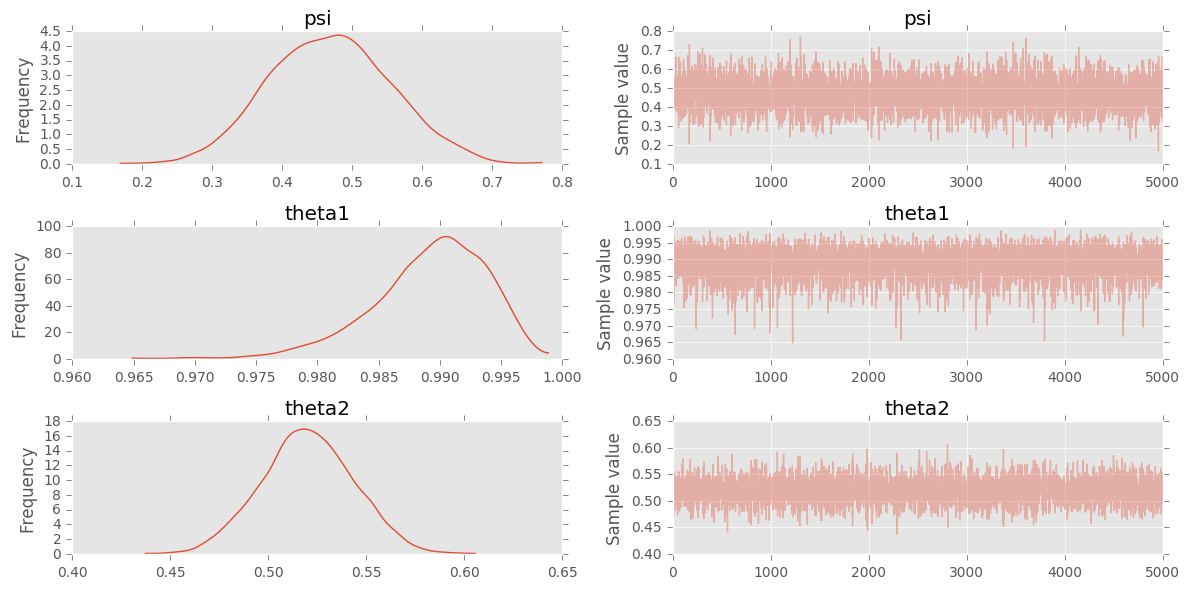

zi [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1]
zi ModeResult(mode=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]]), count=array([[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000,
        5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 4997, 5000]]))


In [9]:
with model6:
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace6=pm.sample(1e4, step, model=model6)
    
    # step1=pm.NUTS(psi)
    # step2=pm.Metropolis([theta1,theta2])
    # trace6=pm.sample(1e4, step=[step1,step2], model=model6)
    
burnin=5000
pm.traceplot(trace6[burnin:],['psi','theta1','theta2']);
plt.show()

ztrace = trace6['zi'][burnin:]
print('zi',ztrace[-1,:])
print('zi',stats.mode(ztrace[:],axis=0))

 [-----------------100%-----------------] 20000 of 20000 complete in 5.0 secPlotting lambdam
Plotting lambdab
Plotting theta1
Plotting psi
Plotting mub
Plotting theta2
Plotting mud
[[False False False False False False False False False False  True  True
   True False False  True  True  True  True  True  True  True]]


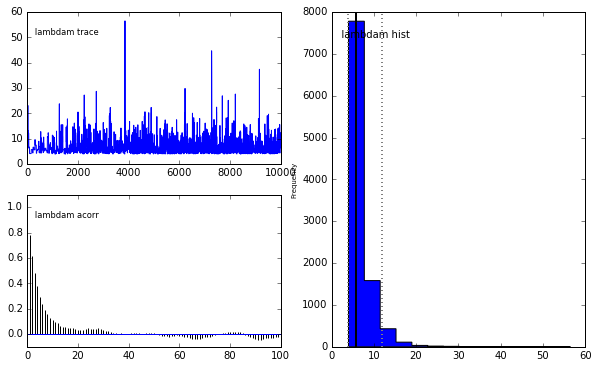

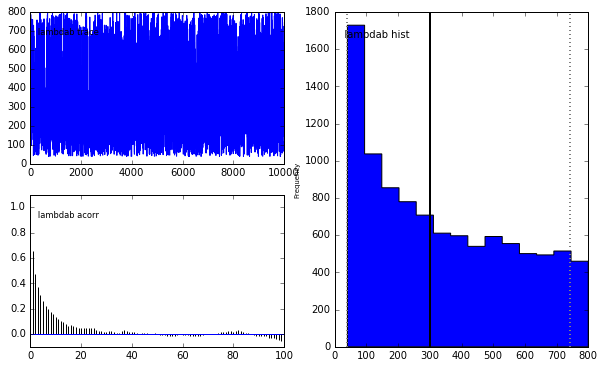

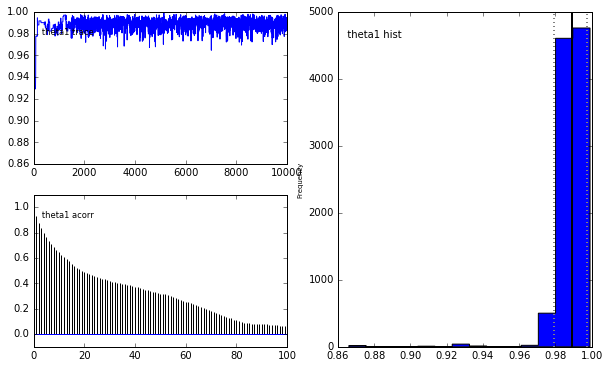

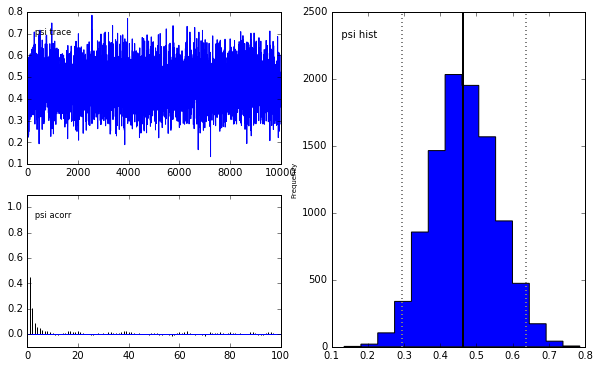

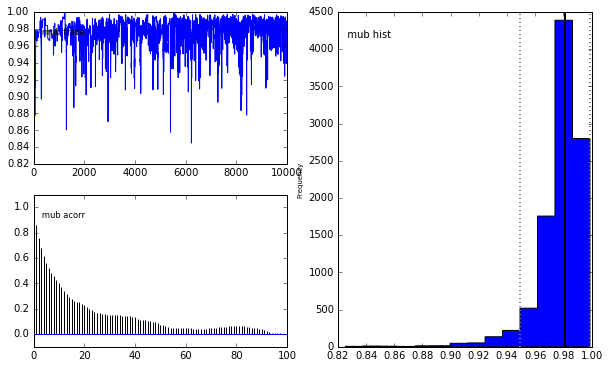

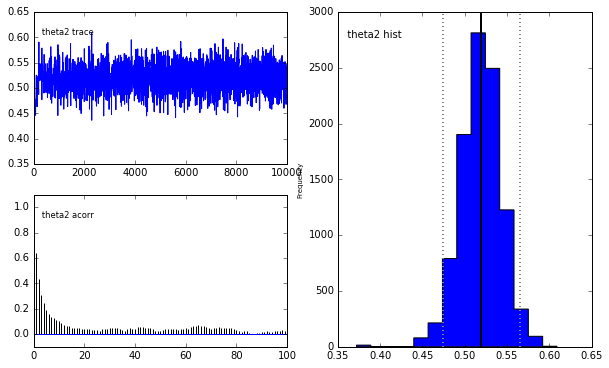

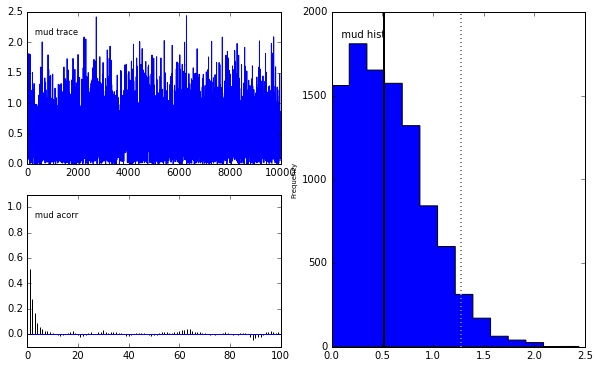

In [18]:
# using pymc2
import numpy as np
mub = pymc.Beta("mub",alpha=1,beta=1)
mud = pymc.HalfNormal("mud",tau=1/.5**2)
lambdab = pymc.Uniform("lambdab",lower=40,upper=800)
lambdam = pymc.Uniform("lambdam",lower=4,upper=100)
psi = pymc.Beta("psi",alpha=5,beta=5)

zi = pymc.Bernoulli("zi",p=psi,size=p)

@pymc.deterministic
def mum(mub=mub,mud=mud):
    return pymc.invlogit(pymc.logit(mub)-mud)

theta1 = pymc.Beta("theta1",alpha=mub*lambdab,beta=(1-mub)*lambdab)
theta2 = pymc.Beta("theta2",alpha=mum*lambdam,beta=(1-mum)*lambdam)
# theta = theta1*(zi==0)+theta2*(zi==1)
def thetafunc(psib=psib,psim=psim,zi=zi):
    return psib*(zi==0)+psim*(zi==1)
theta = pymc.Deterministic(eval = thetafunc,
                  name = 'theta',
                  parents = {'psib': theta1,
                          'psim': theta2,
                          'zi': zi},
                  doc = 'Theta',
                  trace = False,
                  verbose = 0,
                  dtype=float,
                  plot=False)

kij = pymc.Binomial("kij",p=theta, n=n, value=k, observed = True)

testmodel = pymc.Model([theta1,theta2,psi,zi,kij])
mcmc = pymc.MCMC(testmodel)
mcmc.sample(iter = 20000, burn = 50, thin = 2)
pymc.Matplot.plot(mcmc)
zi =  mcmc.trace("zi")[:]
print(zi[-1:])

## 6.7 Alzheimer's recall test cheating


$$ \mu_{b} \sim \text{Beta}(1,1) $$
$$ \mu_{d} \sim \text{Gaussian}(0,0.5)_{\mathcal I(0,∞)} $$
$$ \lambda_{b} \sim \text{Uniform}(5,50) $$
$$ \lambda_{c} \sim \text{Uniform}(5,50) $$
$$ z_{i} \sim \text{Bernoulli}(\phi) $$
$$   \theta_{i} \sim
\begin{cases}
\text{Beta}(\mu_{b}\lambda_{b},(1-\mu_{b})\lambda_{b})  & \text{if $z_{i} = 0$} \\
\text{Beta}(\mu_{c}\lambda_{c},(1-\mu_{c})\lambda_{c})  & \text{if $z_{i} = 1$}
\end{cases}  $$
$$ k_{i} \sim \text{Binomial}(\theta_{i},n) $$ 
$$ \text{logit}\mu_{c} = \text{logit}\mu_{b} + \mu_{d} $$
$$ \phi \sim \text{Beta}(5,5)$$

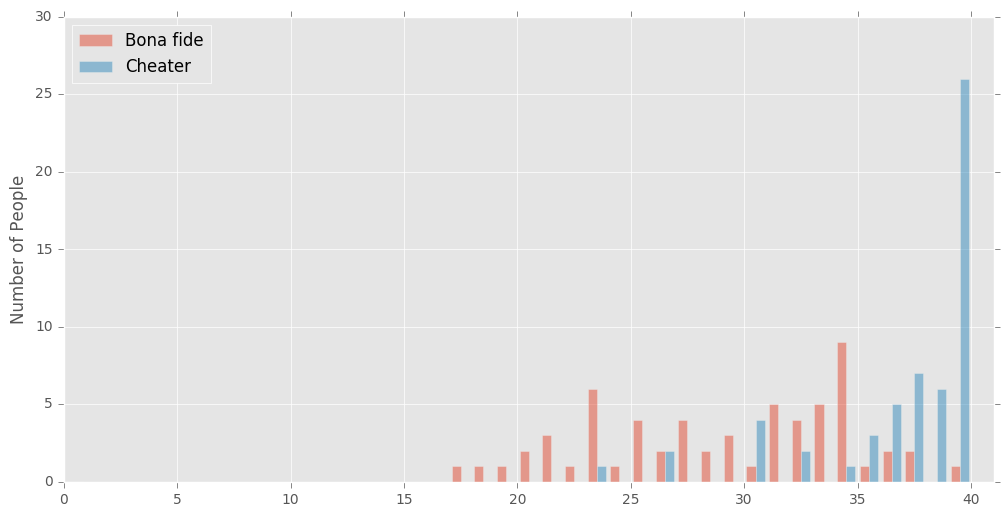

In [10]:
# Load data
dat = pd.read_csv('cheat.csv',header=None)
truth = pd.read_csv('cheatt.csv',header=None)
k = np.array(dat.sum(axis=1))
t1 = truth.values.T

p = len(k) # number of people
n = 40     # number of questions

fig = plt.figure(figsize=(12, 6))
bins = np.arange(0,n+1)
plt.hist([k[t1[0,:]==0],k[t1[0,:]==1]], bins, alpha=0.5, label=['Bona fide','Cheater'])
plt.xlim([0,41])
plt.legend(loc='upper left')
plt.ylabel('Number of People')
plt.show()

In [11]:
with pm.Model() as model7:
    # prior
    mub = pm.Beta("mub",alpha=1,beta=1)
    mud = pm.HalfNormal("mud",tau=1/.5**2)
    lambdab = pm.Uniform("lambdab",lower=5,upper=50)
    lambdac = pm.Uniform("lambdac",lower=5,upper=50)
    psi = pm.Beta("psi",alpha=5,beta=5)
    # psi = pm.Uniform("psi",lower=0,upper=1)
    zi = pm.Bernoulli("zi",p=psi,shape=p)
    
    muc = pm.Deterministic("muc",1/(1+T.exp(T.log(1/mub-1)-mud)))
    theta1 = pm.Beta("theta1",alpha=mub*lambdab,beta=(1-mub)*lambdab)
    theta2 = pm.Beta("theta2",alpha=muc*lambdac,beta=(1-muc)*lambdac)
    
    theta = pm.Deterministic("theta",theta1*(T.eq(zi,0))+theta2*(T.eq(zi,1)))
    # theta = theta1*(T.eq(zi,0))+theta2*(T.eq(zi,1))
    # observed
    kij = pm.Binomial("kij",p=theta, n=n, observed = k)

Optimization terminated successfully.
         Current function value: 629.191034
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21


Assigned NUTS to mub_logodds_
Assigned NUTS to mud_log_
Assigned NUTS to lambdab_interval_
Assigned NUTS to lambdac_interval_
Assigned NUTS to psi_logodds_
Assigned BinaryGibbsMetropolis to zi
Assigned NUTS to theta1_logodds_
Assigned NUTS to theta2_logodds_
100%|██████████| 3000/3000.0 [02:26<00:00, 20.44it/s]


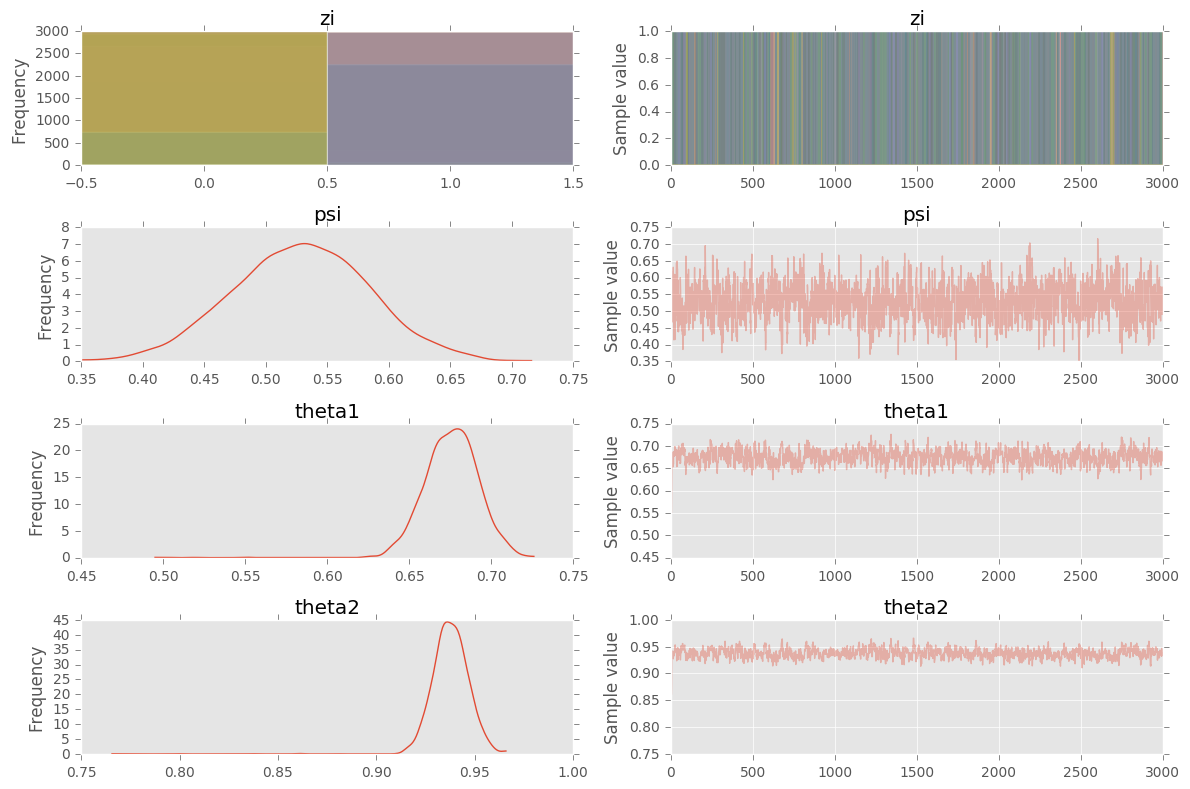

zi [0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1
 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 1 0 0]
zi ModeResult(mode=array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 0]]), count=array([[2998, 3000, 3000, 2255, 2996, 3000, 2979, 2668, 2994, 2946, 3000,
        3000, 3000, 3000, 2999, 3000, 2247, 2994, 3000, 2996, 1867, 2985,
        3000, 2934, 3000, 2243, 3000, 3000, 3000, 3000, 2842, 2998, 3000,
        3000, 2932, 2999, 3000, 2253, 1865, 3000, 2977, 2836, 3000, 2999,
        3000, 3000, 3000, 2996

In [12]:
# 2016-02-17 update:
# The following model is fitted using the Gibbs branch (pymc3@Gibbs). There were some problem previously.
# See discussion here: https://github.com/pymc-devs/pymc3/issues/981
with model7:
    start = pm.find_MAP()
    start['zi']=np.random.binomial(1,.5,p)
    trace7=pm.sample(3e3, model=model7)

burnin=0
pm.traceplot(trace7[burnin:],varnames=['zi','psi','theta1','theta2']);
plt.show()

ztrace = trace7['zi'][burnin:]
print('zi',ztrace[-1,:])
print('zi',stats.mode(ztrace[:],axis=0))
print(np.mean(ztrace[-1:]==(t1[0,:]==1)))

 [-----------------100%-----------------] 20000 of 20000 complete in 9.0 secPlotting psi
Plotting theta1
Plotting lambdab
Plotting mub
Plotting mud
Plotting theta2
Plotting lambdac
[[ True  True False False  True  True False  True  True  True False  True
  False False  True False  True  True False False  True  True False  True
  False  True False  True False  True False  True False  True  True False
  False  True  True False False False  True False  True False False False
  False False  True  True False  True False  True  True False False  True
  False  True  True  True False False  True  True False  True False  True
  False  True False  True  True False False  True  True False  True False
   True  True  True False  True False  True  True False  True  True False
  False False  True False  True False  True False  True False  True False
  False False  True False  True  True False False  True  True]]


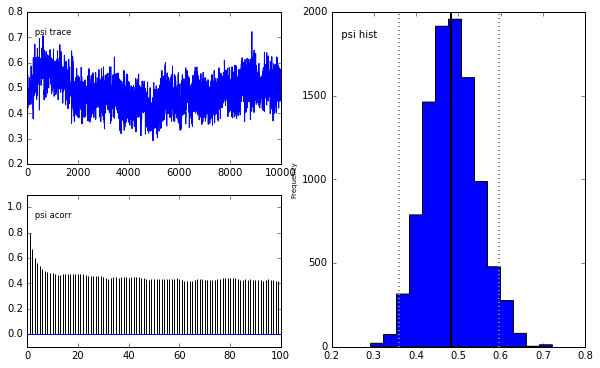

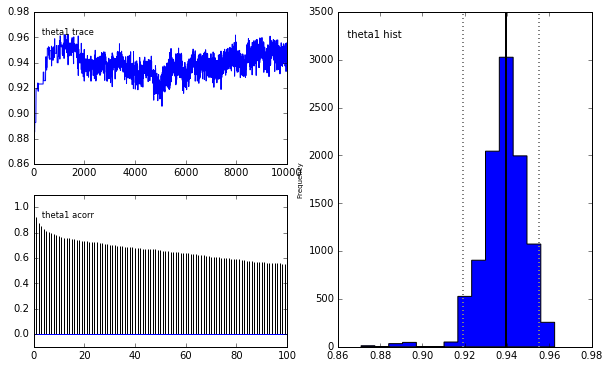

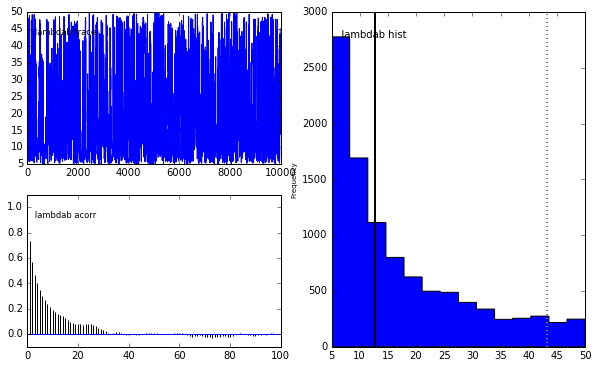

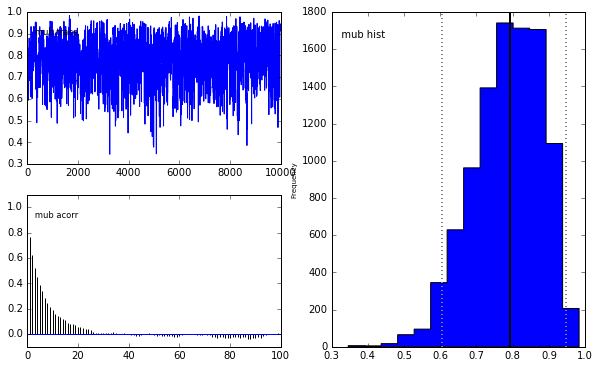

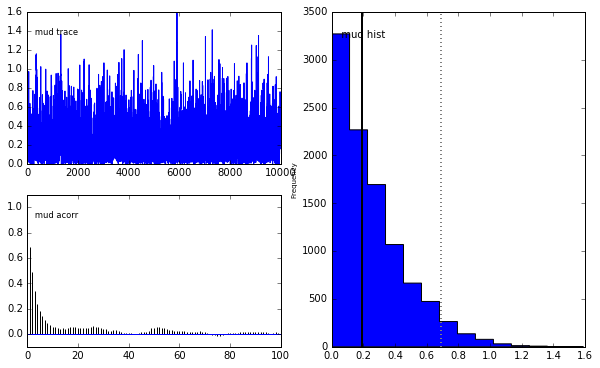

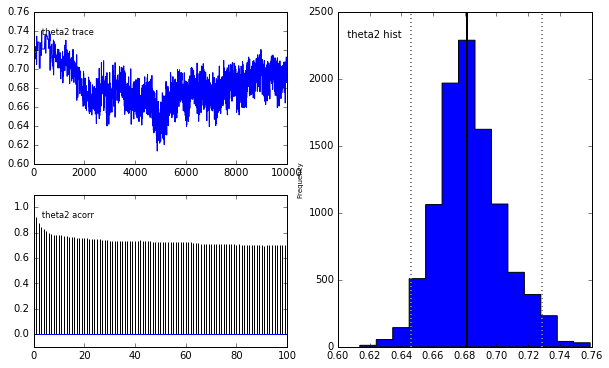

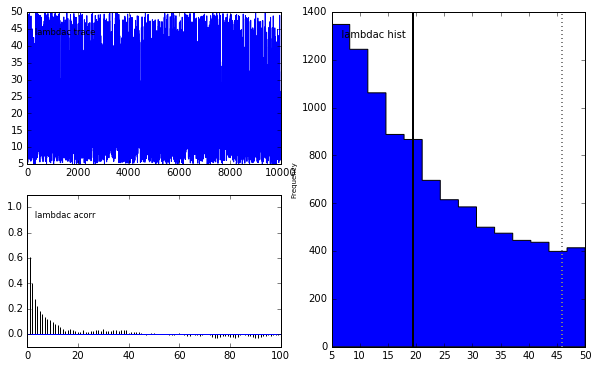

In [51]:
# using pymc2
import pymc as pymc

mub = pymc.Beta("mub",alpha=1,beta=1)
mud = pymc.HalfNormal("mud",tau=1/.5**2)
lambdab = pymc.Uniform("lambdab",lower=5,upper=50)
lambdac = pymc.Uniform("lambdac",lower=5,upper=50)
psi = pymc.Beta("psi",alpha=5,beta=5)

zi = pymc.Bernoulli("zi",p=psi,size=p)

@pymc.deterministic
def muc(mub=mub,mud=mud):
    return pymc.invlogit(pymc.logit(mub)+mud)

theta1 = pymc.Beta("theta1",alpha=mub*lambdab,beta=(1-mub)*lambdab)
theta2 = pymc.Beta("theta2",alpha=muc*lambdac,beta=(1-muc)*lambdac)
# theta = theta1*(zi==0)+theta2*(zi==1)
def thetafunc(theta1=theta1,theta2=theta2,zi=zi):
    return theta1*(zi==0)+theta2*(zi==1)
theta = pymc.Deterministic(eval = thetafunc,
                  name = 'theta',
                  parents = {'theta1': theta1,
                          'theta2': theta2,
                          'zi': zi},
                  doc = 'Theta',
                  trace = False,
                  verbose = 0,
                  dtype=float,
                  plot=False)

kij = pymc.Binomial("kij",p=theta, n=n, value=k, observed = True)

testmodel = pymc.Model([theta1,theta2,psi,zi,kij])
mcmc = pymc.MCMC(testmodel)
mcmc.sample(iter = 20000, burn = 50, thin = 2)
pymc.Matplot.plot(mcmc)
zi =  mcmc.trace("zi")[:]
print(zi[-1:])


0.779661016949


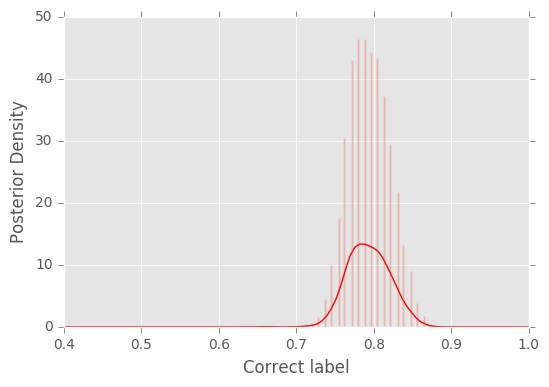

In [13]:
from scipy.stats.kde import gaussian_kde # for plotting: to calculate a continuous 
                                         # approximation of the posterior and prior densities. 
burnin=0
# pymc2
# ztrace =  mcmc.trace("zi")[burnin:]
# pymc3
ztrace = trace7['zi'][burnin:]

print(np.mean(ztrace[-1:]==(t1[0,:]==1)))
pc=np.mean(ztrace==(t1[0,:]==1),axis=1)

my_pdf = gaussian_kde(pc)
x=np.linspace(.4, 1, 100)
plt.plot(x,my_pdf(x),'r') # distribution function
plt.hist(pc, bins=100, normed=1, alpha=.3)
plt.xlabel('Correct label')
plt.ylabel('Posterior Density')
plt.show()

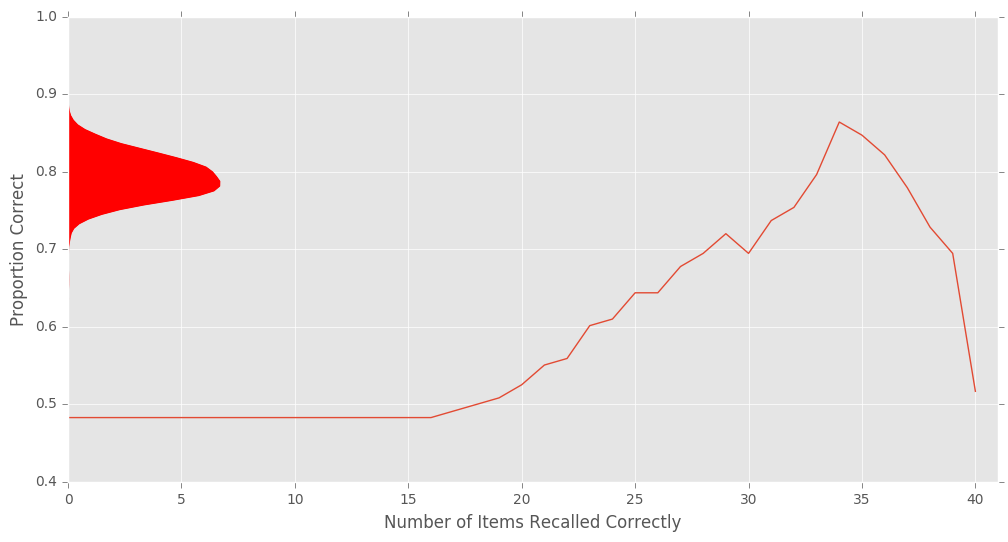

In [14]:
fig = plt.figure(figsize=(12, 6))
my_pdf = gaussian_kde(pc)
x=np.linspace(0.4, 1, 100)
tmp = np.zeros(n+1)
for i in range(n+1):
    tmp[i] = np.mean((k>i)==(t1[0,:]==1))
plt.plot(tmp)
pdfpc=my_pdf(x)/2
plt.plot(pdfpc,x,'r') 
plt.fill_between(pdfpc,x,0,color='r')
plt.axis([0,41,.4,1])
plt.xlabel('Number of Items Recalled Correctly')
plt.ylabel('Proportion Correct')
plt.show()

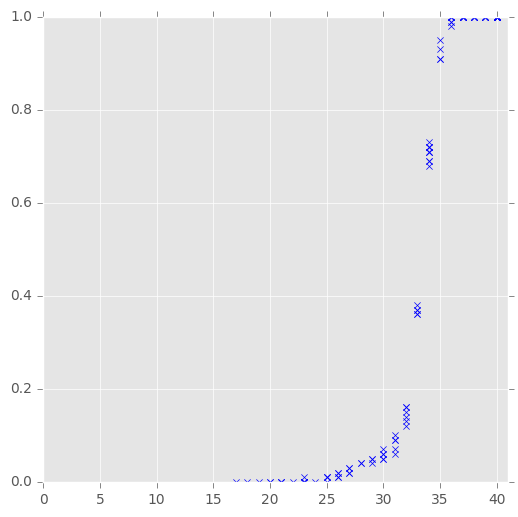

In [15]:
pc2=np.mean(ztrace[0:100],axis=0)
# pc2.shape
plt.figure(figsize=(6, 6))
plt.scatter(k, pc2,marker='x')
plt.axis([0,41,0,1])
plt.show()